<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 2 - Binary and Multi-class Classification Using Logistic Regression</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate two logistic regression models- Binary and Multi-class Classification Using Logistic Regression.**



**Guidelines**
* Download `weatherAUS.csv` and `penguins.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 2 - Binary and Multi-class Classification Using Logistic Regression (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Binary Classification Using Logistic Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `weatherAUS.csv` file into a dataset and perform the following:

> **Q1.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

    - Dealing with the missing data
    - Dealing with the irregular data (outliers)
    - Dealing with the unnecessary data
    - Dealing with the inconsistent data
    - Encoding categorical data 

> **Q1.2.** Visualize the dataset

> **Q1.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q1.4.** Build a classification model using Logistic Regression to predict the target variable `RainTomorrow` from the dataset.

> **Q1.5.** Evaluate and discuss the model performance 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
weatherAUS_df = pd.read_csv('weatherAUS.csv')
weatherAUS_df.head()



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,5/18/2009,Hobart,5.1,14.3,0.0,1.8,8.9,NW,30.0,WSW,...,47.0,1023.1,1022.2,1.0,1.0,9.1,13.3,No,0.0,No
1,7/3/2009,Launceston,1.1,14.5,0.4,NaN,NaN,SSW,50.0,E,...,46.0,1001.5,1002.4,NaN,NaN,1.3,13.7,No,0.0,No
2,2/18/2010,Williamtown,19.7,26.2,0.0,7.2,7.2,SSE,41.0,SSE,...,50.0,1020.9,1021.9,6.0,4.0,22.7,24.4,No,0.2,No
3,3/4/2010,PerthAirport,16.6,28.0,0.0,9.0,11.3,SW,54.0,SSE,...,41.0,1018.3,1014.9,6.0,1.0,20.0,26.1,No,0.0,No
4,9/9/2010,GoldCoast,14.6,25.3,0.0,NaN,NaN,NNW,43.0,WNW,...,67.0,1020.3,1015.0,NaN,NaN,22.2,22.6,No,0.4,No


In [3]:
weatherAUS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36881 entries, 0 to 36880
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           36881 non-null  object 
 1   Location       36881 non-null  object 
 2   MinTemp        36543 non-null  float64
 3   MaxTemp        36639 non-null  float64
 4   Rainfall       36255 non-null  float64
 5   Evaporation    24035 non-null  float64
 6   Sunshine       23317 non-null  float64
 7   WindGustDir    33513 non-null  object 
 8   WindGustSpeed  33520 non-null  float64
 9   WindDir9am     34072 non-null  object 
 10  WindDir3pm     35919 non-null  object 
 11  WindSpeed9am   36219 non-null  float64
 12  WindSpeed3pm   36235 non-null  float64
 13  Humidity9am    36311 non-null  float64
 14  Humidity3pm    36370 non-null  float64
 15  Pressure9am    33309 non-null  float64
 16  Pressure3pm    33329 non-null  float64
 17  Cloud9am       24381 non-null  float64
 18  Cloud3

In [4]:
weatherAUS_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,36543.000000,36639.000000,36255.000000,24035.000000,23317.000000,33520.000000,36219.000000,36235.000000,36311.000000,36370.000000,33309.000000,33329.000000,24381.000000,23899.000000,36394.000000,36437.000000,36261.000000
mean,12.235966,22.939491,2.554823,5.189544,7.544688,40.390573,14.217427,18.874928,69.146953,52.307369,1017.283152,1014.967769,4.331488,4.462321,16.905688,21.485808,2.554748
std,6.389832,6.988266,9.081329,3.765427,3.833809,13.550613,8.997003,8.791849,18.300754,20.317082,7.177877,7.077594,2.848750,2.663067,6.428328,6.820848,8.940267
min,-8.500000,-3.100000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,1.000000,982.900000,980.200000,0.000000,0.000000,-5.900000,-5.100000,0.000000
25%,7.600000,17.800000,0.000000,2.600000,4.700000,31.000000,7.000000,13.000000,58.000000,38.000000,1012.500000,1010.100000,1.000000,2.000000,12.300000,16.500000,0.000000
50%,12.100000,22.300000,0.000000,4.600000,8.400000,39.000000,13.000000,19.000000,70.000000,53.000000,1017.300000,1015.000000,5.000000,5.000000,16.600000,20.900000,0.000000
75%,17.000000,27.900000,0.800000,7.000000,10.600000,48.000000,20.000000,24.000000,83.000000,66.000000,1022.200000,1019.800000,7.000000,7.000000,21.500000,26.200000,0.800000
max,30.500000,48.100000,371.000000,81.200000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,37.700000,46.100000,367.600000


#### **Data Pre-processing**

In [5]:
NA_val_across_columns = weatherAUS_df.isnull().sum()
print(NA_val_across_columns)

total_NA_count_across_df = NA_val_across_columns.sum()
print("Total NA Count\t=>",total_NA_count_across_df)

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64
Total NA Count	=> 75908


In [6]:
# Remove duplicate rows and keep only the last occurrence
weatherAUS_df = weatherAUS_df.drop_duplicates(keep='last')


In [7]:
#Remove NA values from the Target and Encode the target class values
weatherAUS_df.dropna(subset=['RainTomorrow'], inplace=True)
# weatherAUS_df['RainTomorrow']= weatherAUS_df['RainTomorrow'].replace({"Yes":1, "No":0}) 
# weatherAUS_df['RainTomorrow'] = weatherAUS_df['RainTomorrow'].astype(int)

In [8]:
import pandas as pd

# Assuming weatherAUS_df is your DataFrame

# Count rows with at least one NaN value
count_na_rows = weatherAUS_df.isna().any(axis=1).sum()

print("Number of rows with at least one NaN value:", count_na_rows)


Number of rows with at least one NaN value: 18883


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Select numeric columns for normalization and imputation
numeric_columns = weatherAUS_df.select_dtypes(include=['number'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the numeric columns
normalized_data = scaler.fit_transform(numeric_columns)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns.columns, index=weatherAUS_df.index)

# Initialize the KNN imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Impute missing values on normalized data
imputed_data = imputer.fit_transform(normalized_df)

# Convert the imputed data back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=numeric_columns.columns, index=weatherAUS_df.index)

# Inverse transform to get original scale
imputed_original_scale = scaler.inverse_transform(imputed_df)

# Update the original DataFrame with the imputed values
weatherAUS_df[numeric_columns.columns] = imputed_original_scale

# Verify if any missing values are remaining
print("Number of missing values after imputation:")
print(weatherAUS_df.isnull().sum())

print(weatherAUS_df.head())
# Now weatherAUS_df contains imputed values for normalized numeric columns


Number of missing values after imputation:
Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      3022
WindGustSpeed       0
WindDir9am       2614
WindDir3pm        801
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         349
RISK_MM             0
RainTomorrow        0
dtype: int64
        Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  5/18/2009        Hobart      5.1     14.3       0.0         1.80      8.90   
1   7/3/2009    Launceston      1.1     14.5       0.4         1.92      6.24   
2  2/18/2010   Williamtown     19.7     26.2       0.0         7.20      7.20   
3   3/4/2010  PerthAirport     16.6     28.0       0.0         9.00     11.30   
4   9/9/201

In [10]:
# from sklearn.preprocessing import StandardScaler

# # Select numeric columns for normalization and imputation
# numeric_columns = weatherAUS_df.select_dtypes(include=['number'])

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Normalize the numeric columns
# normalized_data = scaler.fit_transform(numeric_columns)

# # Convert the normalized data back to a DataFrame
# normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns.columns, index=weatherAUS_df.index)

# # Calculate the mean values for each column
# column_means = normalized_df.mean()

# # Impute missing values with column-wise means
# imputed_df = normalized_df.fillna(column_means)

# # Inverse transform to get original scale
# imputed_original_scale = scaler.inverse_transform(imputed_df)

# # Convert the imputed data back to a DataFrame
# imputed_original_scale_df = pd.DataFrame(imputed_original_scale, columns=numeric_columns.columns, index=weatherAUS_df.index)

# # Update the original DataFrame with the imputed values
# weatherAUS_df[numeric_columns.columns] = imputed_original_scale_df

# # Verify if any missing values are remaining
# print("Number of missing values after imputation:")
# print(weatherAUS_df.isnull().sum())

# print(weatherAUS_df.head())
# # Now weatherAUS_df contains imputed values for normalized numeric columns


In [11]:
from sklearn.impute import SimpleImputer

# Define the imputer with 'most_frequent' strategy
mode_imputer = SimpleImputer(strategy='most_frequent')

count_na_rows = weatherAUS_df.isna().any(axis=1).sum()

print("Number of rows with at least one NaN value:", count_na_rows)
# Select categorical columns
categorical_columns = weatherAUS_df.select_dtypes(exclude=['number']).columns

# Impute missing values in categorical columns
weatherAUS_df[categorical_columns] = mode_imputer.fit_transform(weatherAUS_df[categorical_columns])

print(weatherAUS_df.isna().sum())


# Assuming weatherAUS_df is your DataFrame

# Count rows with at least one NaN value
count_na_rows = weatherAUS_df.isna().any(axis=1).sum()

print("Number of rows with at least one NaN value:", count_na_rows)

Number of rows with at least one NaN value: 5361
Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64
Number of rows with at least one NaN value: 0


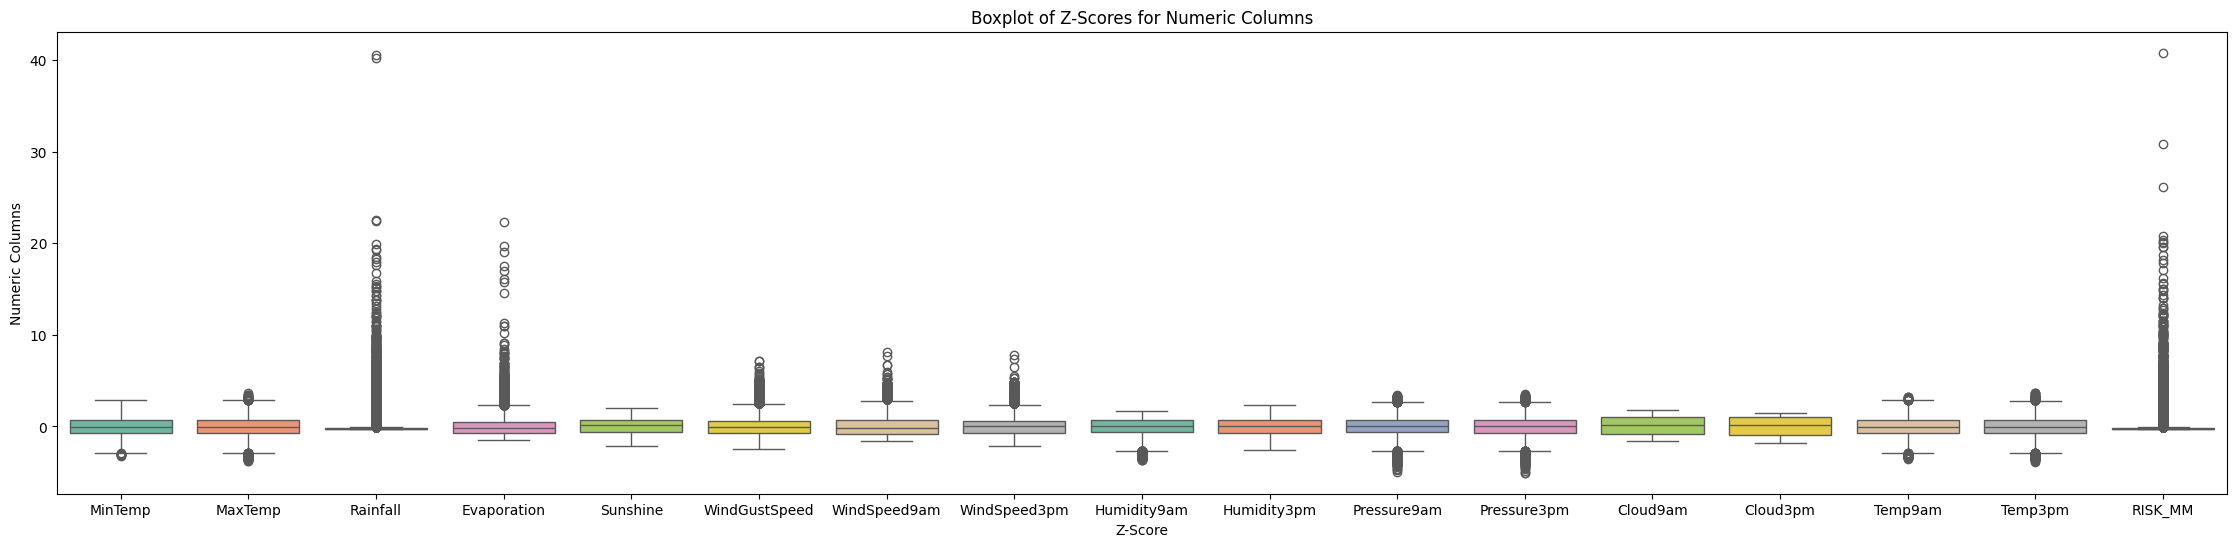

NameError: name 'abs_z_scores' is not defined

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Calculate z-scores for each numeric column
z_scores = stats.zscore(weatherAUS_df.select_dtypes(include=np.number))

# Create a DataFrame of z-scores
z_scores_df = pd.DataFrame(z_scores, columns=weatherAUS_df.select_dtypes(include=np.number).columns)

# Set up the boxplot figure
plt.figure(figsize=(28, 6))

# Draw boxplots for each numeric column
sns.boxplot(data=z_scores_df, orient='v', palette='Set2')

# Add title and labels
plt.title('Boxplot of Z-Scores for Numeric Columns')
plt.xlabel('Z-Score')
plt.ylabel('Numeric Columns')

# Display the plot
plt.show()

threshold = 3
abs_z_scores = np.abs(z_scores)
# Find rows with any z-score exceeding the threshold
outlier_rows = weatherAUS_df[(abs_z_scores > threshold).any(axis=1)]

# Print rows with outliers
print("Rows with outliers:")
print(outlier_rows)

# Replace outlier values with column-wise average
for column in weatherAUS_df.select_dtypes(include=np.number).columns:
    mean_value = weatherAUS_df[column].mean()
    weatherAUS_df.loc[outlier_rows.index, column] = mean_value

# Verify that the outliers have been replaced with the average values
print("\nUpdated DataFrame:")
print(weatherAUS_df)


In [ ]:
# import matplotlib.pyplot as plt
# import matplotlib.pylab as pylab
# import seaborn as sns

# weatherAUS_df_numeric = weatherAUS_df.select_dtypes(include=['number'])
# params = {
#     'legend.fontsize': 'x-large',
#     'figure.figsize': (15, 5),
#     'axes.labelsize': 'x-large',
#     'axes.titlesize':'x-large',
#     'xtick.labelsize':'x-large',
#     'ytick.labelsize':'x-large'
# }
# pylab.rcParams.update(params)

# plt.figure(figsize=(32, 62))

# num_cols = 3
# num_rows = int(weatherAUS_df_numeric.shape[1] / num_cols) + 1

# for index, col in enumerate(weatherAUS_df_numeric.drop('RainTomorrow', axis=1).columns):
#     plt.subplot(num_rows, num_cols, index + 1)
#     sns.histplot(weatherAUS_df_numeric, x=col, hue='RainTomorrow', kde=True, bins=50)

#     # Increase x-axis and y-axis title font size
#     plt.xlabel(col, fontsize=20)
#     plt.ylabel('Count', fontsize=20)

# plt.tight_layout()
# plt.show()

In [ ]:
from pandas.plotting import scatter_matrix
weatherAUS_df_numeric = weatherAUS_df.select_dtypes(include=['number'])
attributes = weatherAUS_df_numeric.columns.tolist()

scatter_matrix(weatherAUS_df_numeric[attributes], figsize=(32, 72))
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(32, 32))

# num_cols = 5
# num_rows = int(weatherAUS_df_numeric.shape[1] / num_cols) + 1

# for index, col in enumerate(weatherAUS_df_numeric.drop('RainTomorrow', axis=1).columns):
#     plt.subplot(num_rows, num_cols, index + 1)
#     sns.scatterplot(data=weatherAUS_df_numeric, x=col, y='RainTomorrow')

#     # Increase x-axis and y-axis title font size
#     plt.xlabel(col, fontsize=20)
#     plt.ylabel('RainTomorrow', fontsize=20)

# plt.tight_layout()
# plt.show()


In [ ]:
# weatherAUS_df.drop(columns=['Cloud9am', 'Cloud3pm'], inplace=True)

In [ ]:
# weatherAUS_df_corr_matrix = weatherAUS_df.corr(numeric_only=True)
# print(weatherAUS_df_corr_matrix['RainTomorrow'])
# fig, ax = plt.subplots(figsize=(20, 10))
# sns.heatmap(weatherAUS_df.corr(numeric_only=True), cmap='RdBu', annot=True, fmt=".2f");

In [ ]:
# from sklearn.impute import SimpleImputer

# # Define the imputer with 'most_frequent' strategy
# mode_imputer = SimpleImputer(strategy='most_frequent')

# # Select categorical columns
# categorical_columns = weatherAUS_df.select_dtypes(exclude=['number']).columns

# # Impute missing values in categorical columns
# weatherAUS_df[categorical_columns] = mode_imputer.fit_transform(weatherAUS_df[categorical_columns])


# # Now weatherAUS_df contains imputed values for categorical columns


In [ ]:
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer

# # Define numeric and categorical columns
# numeric_columns = weatherAUS_df.select_dtypes(include=['number']).columns
# categorical_columns = weatherAUS_df.select_dtypes(exclude=['number']).columns

# # Define the transformer for numeric columns (no imputation needed)
# numeric_transformer = SimpleImputer(strategy='constant')  # Use 'constant' to keep numeric values as they are

# # Define the transformer for categorical columns (impute with mode)
# categorical_transformer = SimpleImputer(strategy='most_frequent')

# # Combine the transformers using ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_columns),
#         ('cat', categorical_transformer, categorical_columns)
#     ])

# # Apply the transformation to the data
# transformed_data = preprocessor.fit_transform(weatherAUS_df)

# # Convert the transformed data back to a DataFrame
# transformed_df = pd.DataFrame(transformed_data, columns=numeric_columns.append(categorical_columns))

# # Verify if any missing values are remaining
# print("Number of missing values after imputation:")
# print(transformed_df.isnull().sum())
# weatherAUS_df = transformed_df

# # Now transformed_df contains imputed values for categorical columns and keeps numeric values unchanged


In [ ]:
print(weatherAUS_df.head())

# Question 2: Multi-Class Classification Using Logistic Regression
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `penguins.csv` file and perform the following:

> **Q2.1.** Preprocess and clean the dataset (**Note:** Make sure to document your preprocessing step): This step should include the following:

        - Dealing with the missing data
        - Dealing with the irregular data (outliers)
        - Dealing with the unnecessary data
        - Dealing with the inconsistent data
        - Encoding categorical data 
        
> **Q2.2.** Visualize the dataset

> **Q2.3.** Discuss the preliminary observations about the dataset. You may base your discussion on your visualizations, measures of central tendency, and measures of variability 

> **Q2.4.** Build a classification model using Logistic Regression to predict the penguins species.

> **Q2.5.** Evaluate and discuss the model performance 

In [ ]:
??? 

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells. 

???

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab2.ipynb** to the **Lab 2 - Binary and Multi-class Classification Using Logistic Regression (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

| Criterion                                  | Excellent                                                   | Good                                                        | Average                                                    | Below Average                                               | Poor                                                        | No Attempt                                                 |
|--------------------------------------------|-------------------------------------------------------------|-------------------------------------------------------------|------------------------------------------------------------|--------------------------------------------------------------|-------------------------------------------------------------|------------------------------------------------------------|
| **Part 1:** Activity-Question 1.1           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.2           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.3           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.4           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 1.5           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.1           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.2           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.3           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.4           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 1:** Activity-Question 2.5           | **10 points** - Completes all aspects of the question correctly | **8 points** - Completes most aspects of the question correctly | **6 points** - Completes aspects of the question correctly, and some incorrectly | **4 points** - Completes most aspects of the question incorrectly or does not attempt many aspects | **2 points** - Minimal effort or completes a few aspects of the question or very few correctly | **0 points** - Did not complete the question                   |
| **Part 2:** Reflection                      | **10 points** - Reflection clearly ties to the module content; experience and importance clearly laid out | **8 points** - Reflection mostly ties to the module content; experience & importance are discussed | **6 points** - Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly | **4 points** - Reflection does not tie to the module content; experience & importance are minimally discussed | **2 points** - Minimal effort to tie to content; minimal effort to describe experience/importance | **0 points** - Did not complete the reflection                 |
